In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import joblib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("car.data")

In [3]:
data

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
# using scikit-learn's preprocessing LabelEncoder.
myPreprocessor = LabelEncoder()

buying = myPreprocessor.fit_transform(list(data["buying"]))
maint = myPreprocessor.fit_transform(list(data["maint"]))
door = myPreprocessor.fit_transform(list(data["door"]))
persons = myPreprocessor.fit_transform(list(data["persons"]))
lug_boot = myPreprocessor.fit_transform(list(data["lug_boot"]))
safety = myPreprocessor.fit_transform(list(data["safety"]))
clas = myPreprocessor.fit_transform(list(data["class"]))

In [5]:
data["door"].unique()

array(['2', '3', '4', '5more', 'more'], dtype=object)

In [6]:
X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(clas)

In [7]:
X

[(np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(1)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(2)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(2),
  np.int64(0)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(2)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(2)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(0)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(1)),
 (np.int64(3),
  np.int64(3),
  np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(2)),

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
best_acc = 0
best_model = None
for i in range(3,15,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"For K={i} the score is {score}")
    if score>best_acc:
        best_acc = score
        best_model = copy.deepcopy(model)
        file_name = 'K_Nearest_Neighbors.sav'
        joblib.dump(model, file_name)

For K=3 the score is 0.8265895953757225
For K=5 the score is 0.8786127167630058
For K=7 the score is 0.9248554913294798
For K=9 the score is 0.9248554913294798
For K=11 the score is 0.8959537572254336
For K=13 the score is 0.8554913294797688


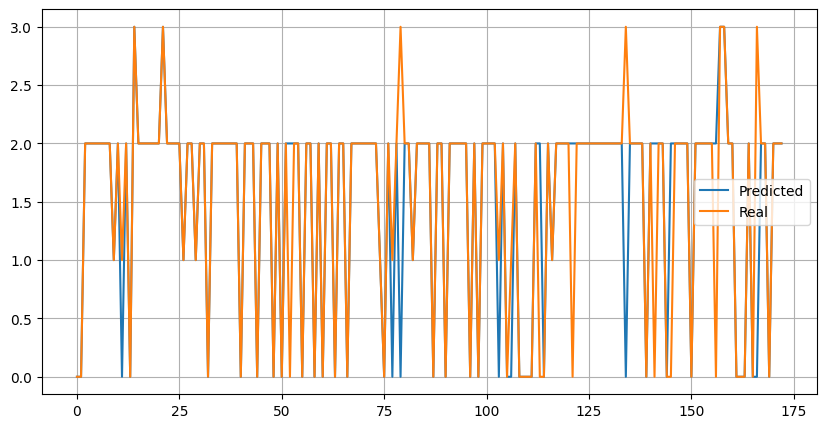

In [10]:
predictions = best_model.predict(x_test)
plt.figure(figsize=(10,5))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Real')
plt.legend()
plt.grid()
plt.show()